<a href="https://colab.research.google.com/github/Neermita18/Stock_Market_Analysis/blob/main/TATA_MOTORS_Technical_stock_market_analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

In [97]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [103]:
df= pd.read_csv('TATAMOTORS.NS.csv')

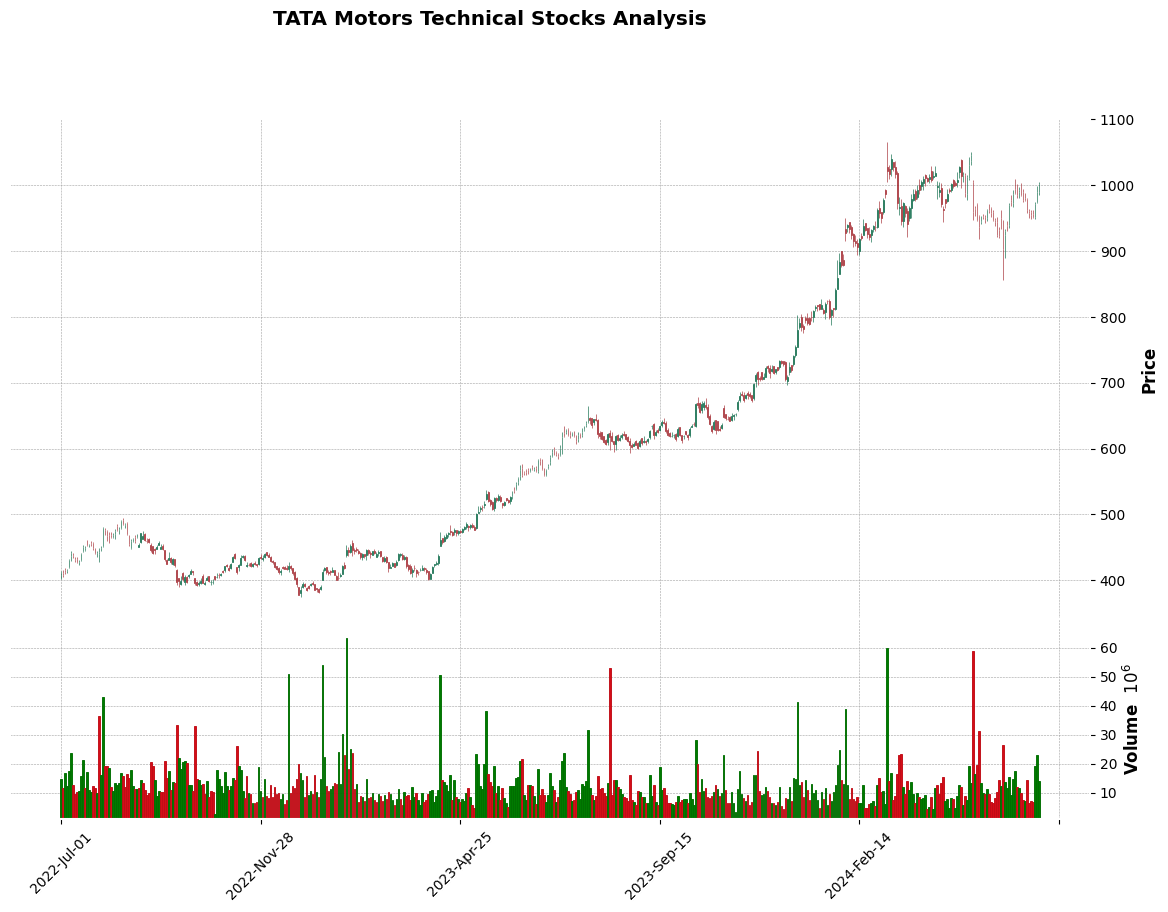

In [107]:
df2=df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Plot the candlestick chart
mpf.plot(df2, type='candle', style='charles', title='TATA Motors Technical Stocks Analysis', ylabel='Price', volume=True,figsize=(15, 10))

In [3]:
df.index=df['Date']

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-07-01,2022-07-01,410.649994,414.600006,402.299988,412.700012,410.152069,14725989
2022-07-04,2022-07-04,411.549988,414.899994,405.000000,408.450012,405.928284,11525133
2022-07-05,2022-07-05,415.000000,418.799988,410.200012,412.000000,409.456360,16771012
2022-07-06,2022-07-06,414.000000,417.299988,410.649994,416.350006,413.779510,12196920
2022-07-07,2022-07-07,419.899994,432.950012,419.299988,430.850006,428.190002,17616800
...,...,...,...,...,...,...,...
2024-06-25,2024-06-25,960.000000,962.849976,949.299988,955.000000,955.000000,7304128
2024-06-26,2024-06-26,956.000000,962.500000,950.099976,951.849976,951.849976,6908988
2024-06-27,2024-06-27,952.500000,974.849976,948.049988,972.099976,972.099976,19385412


In [5]:
df.drop('Date',axis=1,inplace=True)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,410.649994,414.600006,402.299988,412.700012,410.152069,14725989
2022-07-04,411.549988,414.899994,405.000000,408.450012,405.928284,11525133
2022-07-05,415.000000,418.799988,410.200012,412.000000,409.456360,16771012
2022-07-06,414.000000,417.299988,410.649994,416.350006,413.779510,12196920
2022-07-07,419.899994,432.950012,419.299988,430.850006,428.190002,17616800
...,...,...,...,...,...,...
2024-06-25,960.000000,962.849976,949.299988,955.000000,955.000000,7304128
2024-06-26,956.000000,962.500000,950.099976,951.849976,951.849976,6908988
2024-06-27,952.500000,974.849976,948.049988,972.099976,972.099976,19385412


In [100]:
import mplfinance as mpf

<function matplotlib.pyplot.show(close=None, block=None)>

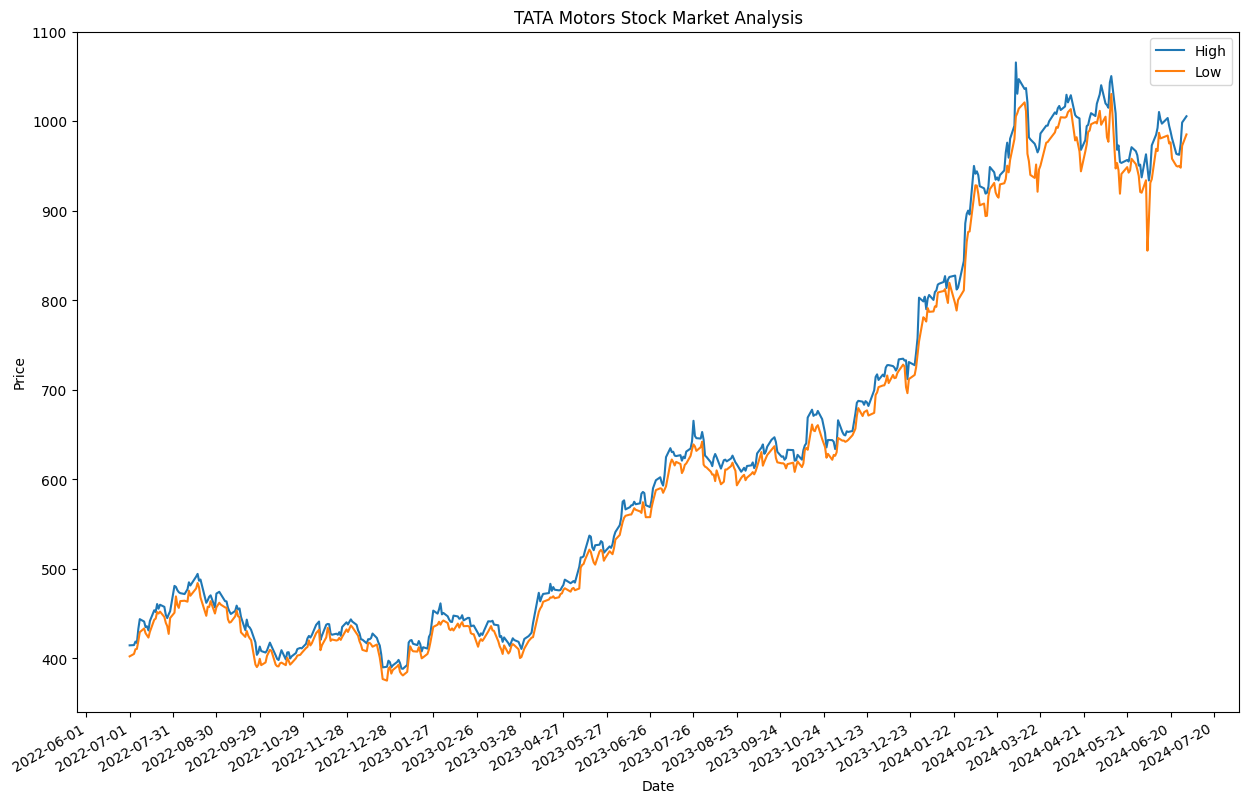

In [7]:

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
x_dates= [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df.index.values]
plt.plot(x_dates,df['High'])
plt.plot(x_dates,df['Low'])
plt.legend(['High','Low'])
plt.title('TATA Motors Stock Market Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gcf().autofmt_xdate()
plt.show

In [8]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [9]:
y= df['Close']

In [10]:
X= df.drop('Close',axis=1)

In [11]:
X= X.drop('Adj Close', axis=1)

In [12]:
X

,Open,High,Low,Volume
Date,,,,
2022-07-01,410.649994,414.600006,402.299988,14725989
2022-07-04,411.549988,414.899994,405.000000,11525133
2022-07-05,415.000000,418.799988,410.200012,16771012
2022-07-06,414.000000,417.299988,410.649994,12196920
2022-07-07,419.899994,432.950012,419.299988,17616800
...,...,...,...,...
2024-06-25,960.000000,962.849976,949.299988,7304128
2024-06-26,956.000000,962.500000,950.099976,6908988
2024-06-27,952.500000,974.849976,948.049988,19385412


In [13]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

In [14]:
train_df = df[:split_index]
test_df= df[split_index:]

In [18]:
scaler= StandardScaler()
train_data_scaled = scaler.fit_transform(train_df)
test_data_scaled = scaler.transform(test_df)
train_df_scaled = pd.DataFrame(train_data_scaled, columns=df.columns, index=train_df.index)
test_df_scaled = pd.DataFrame(test_data_scaled, columns=df.columns, index= test_df.index)

In [20]:
test_df_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-02,2.888206,2.890326,2.889762,2.828082,2.824720,0.044797
2024-02-05,3.280497,3.328615,3.207294,3.219989,3.215067,3.536201
2024-02-06,3.300112,3.258327,3.314925,3.323981,3.318645,0.005560
2024-02-07,3.362225,3.280140,3.312038,3.277083,3.271933,-0.647196
2024-02-08,3.305016,3.245400,3.235748,3.199599,3.194757,-0.149215
...,...,...,...,...,...,...
2024-06-25,3.492989,3.432430,3.487299,3.449996,3.468098,-0.729967
2024-06-26,3.460298,3.429603,3.493897,3.424303,3.442429,-0.783682
2024-06-27,3.431693,3.529379,3.476989,3.589467,3.607443,0.912362


In [54]:
def lstm_split(df, n_steps, target_col):
    X, y = [], []
    for i in range(len(df) - n_steps+1):
        X.append(df.iloc[i:i+n_steps].drop(columns=[target_col]).values)
        y.append(df.iloc[i+n_steps-1][target_col])
    return np.array(X), np.array(y)


n_steps= 10


X_train, y_train = lstm_split(train_df_scaled, n_steps, 'Close')
X_test, y_test = lstm_split(test_df_scaled, n_steps, 'Close')

In [55]:
X_test

array([[[ 2.88820618,  2.8903256 ,  2.88976245,  2.82472023,
          0.04479653],
        [ 3.28049749,  3.32861456,  3.2072937 ,  3.21506662,
          3.53620059],
        [ 3.30011226,  3.25832665,  3.31492482,  3.31864486,
          0.00555964],
        ...,
        [ 3.09742802,  3.07897144,  3.03120839,  3.05340413,
         -0.55731116],
        [ 3.00262448,  3.08583893,  3.03409484,  3.14601498,
         -0.82963676],
        [ 3.19631842,  3.1427962 ,  3.21554127,  3.16429314,
         -0.84868738]],

       [[ 3.28049749,  3.32861456,  3.2072937 ,  3.21506662,
          3.53620059],
        [ 3.30011226,  3.25832665,  3.31492482,  3.31864486,
          0.00555964],
        [ 3.36222485,  3.2801402 ,  3.31203788,  3.27193284,
         -0.64719573],
        ...,
        [ 3.00262448,  3.08583893,  3.03409484,  3.14601498,
         -0.82963676],
        [ 3.19631842,  3.1427962 ,  3.21554127,  3.16429314,
         -0.84868738],
        [ 3.20694287,  3.31891959,  3.2794599 , 

In [56]:
y_test #5-days timestep. Hence first value is the closing value of 5th day. We take features of previous 4 days for one target point.

array([3.16901274, 3.3162329 , 3.26729542, 3.21631888, 3.17309087,
       3.26484864, 3.30644579, 3.30277538, 3.51279873, 3.47487199,
       3.41084565, 3.63269565, 3.71262677, 3.99564863, 3.96098458,
       4.13756752, 4.04540153, 3.9516047 , 3.59843932, 3.55398768,
       3.37536568, 3.59232214, 3.47242521, 3.33132225, 3.53074257,
       3.65227035, 3.70447053, 3.64289096, 3.75830156, 3.75381572,
       3.85495337, 3.89165648, 3.9116389 , 3.87493579, 3.92468918,
       3.88635473, 3.92713596, 3.96791719, 3.80723904, 3.75830156,
       3.58334997, 3.51687686, 3.60129381, 3.70895636, 3.74892217,
       3.82722194, 3.81294851, 3.82192018, 3.88146117, 4.04377068,
       3.92632053, 3.94915792, 3.72363751, 3.91571702, 4.0641613 ,
       4.19751573, 3.48873771, 3.52870351, 3.38719234, 3.29828955,
       3.37414254, 3.41981733, 3.38882369, 3.50994375, 3.49526261,
       3.4785424 , 3.3892314 , 3.35701413, 3.19674418, 3.18899565,
       3.41288471, 3.03321153, 3.24568166, 3.31337841, 3.57641

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(383, 10, 5)
(383,)
(90, 10, 5)
(90,)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense, ReLU, PReLU, LeakyReLU, ELU, Softmax, BatchNormalization

In [86]:
lstm= Sequential()


In [87]:
lstm.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]), activation='relu'))
lstm.add(Dropout(0.2))
# lstm.add(LSTM(units = 64, return_sequences = True, activation='relu'))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units = 64, activation='PReLU'))
lstm.add(Dropout(0.2))
lstm.add(Dense(units = 1))
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 10, 64)            17920     
                                                                 
 dropout_18 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_23 (LSTM)              (None, 64)                33088     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51073 (199.50 KB)
Trainable params: 51073 (199.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
h= lstm.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose=2, shuffle=False)

Epoch 1/100
6/6 - 4s - loss: 0.9751 - 4s/epoch - 584ms/step
Epoch 2/100
6/6 - 0s - loss: 0.7163 - 102ms/epoch - 17ms/step
Epoch 3/100
6/6 - 0s - loss: 0.4660 - 123ms/epoch - 20ms/step
Epoch 4/100
6/6 - 0s - loss: 0.1786 - 98ms/epoch - 16ms/step
Epoch 5/100
6/6 - 0s - loss: 0.3947 - 100ms/epoch - 17ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0866 - 98ms/epoch - 16ms/step
Epoch 7/100
6/6 - 0s - loss: 0.1037 - 96ms/epoch - 16ms/step
Epoch 8/100
6/6 - 0s - loss: 0.1162 - 95ms/epoch - 16ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0943 - 90ms/epoch - 15ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0639 - 91ms/epoch - 15ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0459 - 96ms/epoch - 16ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0416 - 113ms/epoch - 19ms/step
Epoch 13/100
6/6 - 0s - loss: 0.0381 - 129ms/epoch - 22ms/step
Epoch 14/100
6/6 - 0s - loss: 0.0377 - 98ms/epoch - 16ms/step
Epoch 15/100
6/6 - 0s - loss: 0.0366 - 93ms/epoch - 16ms/step
Epoch 16/100
6/6 - 0s - loss: 0.0339 - 95ms/epoch - 16ms/step
Epoch 17/100


In [71]:
h

In [89]:
y_pred= lstm.predict(X_test)

3/3 [==============================] - 0s 9ms/step


In [90]:
y_tpred= lstm.predict(X_train)

12/12 [==============================] - 0s 6ms/step


In [91]:
import math
from sklearn.metrics import mean_squared_error


In [92]:
mean_squared_error(y_test,y_pred, squared=False)

0.397173020659975

In [93]:
mean_squared_error(y_train,y_tpred, squared=False)

0.1178267107184882

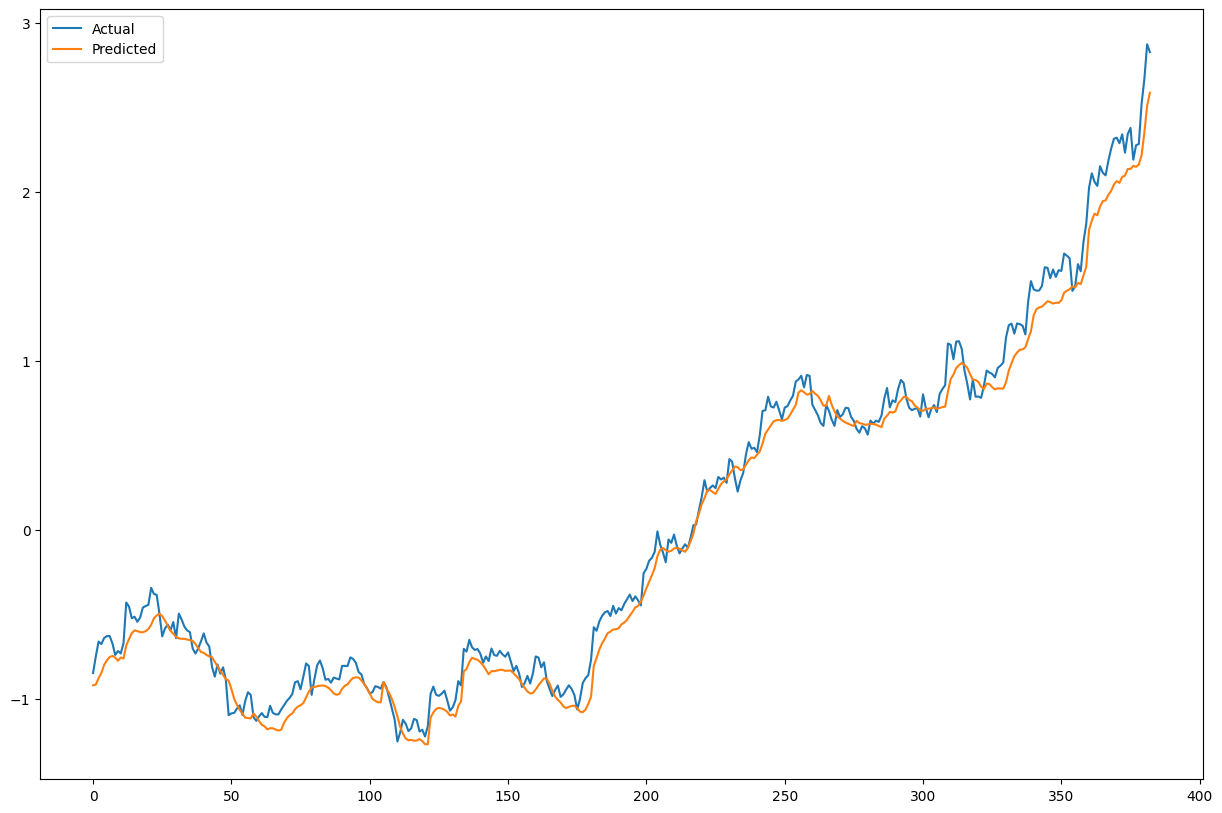

In [95]:
plt.figure(figsize=(15,10))
plt.plot(y_train, label='Actual')
plt.plot(y_tpred, label='Predicted')
plt.legend()
plt.show()

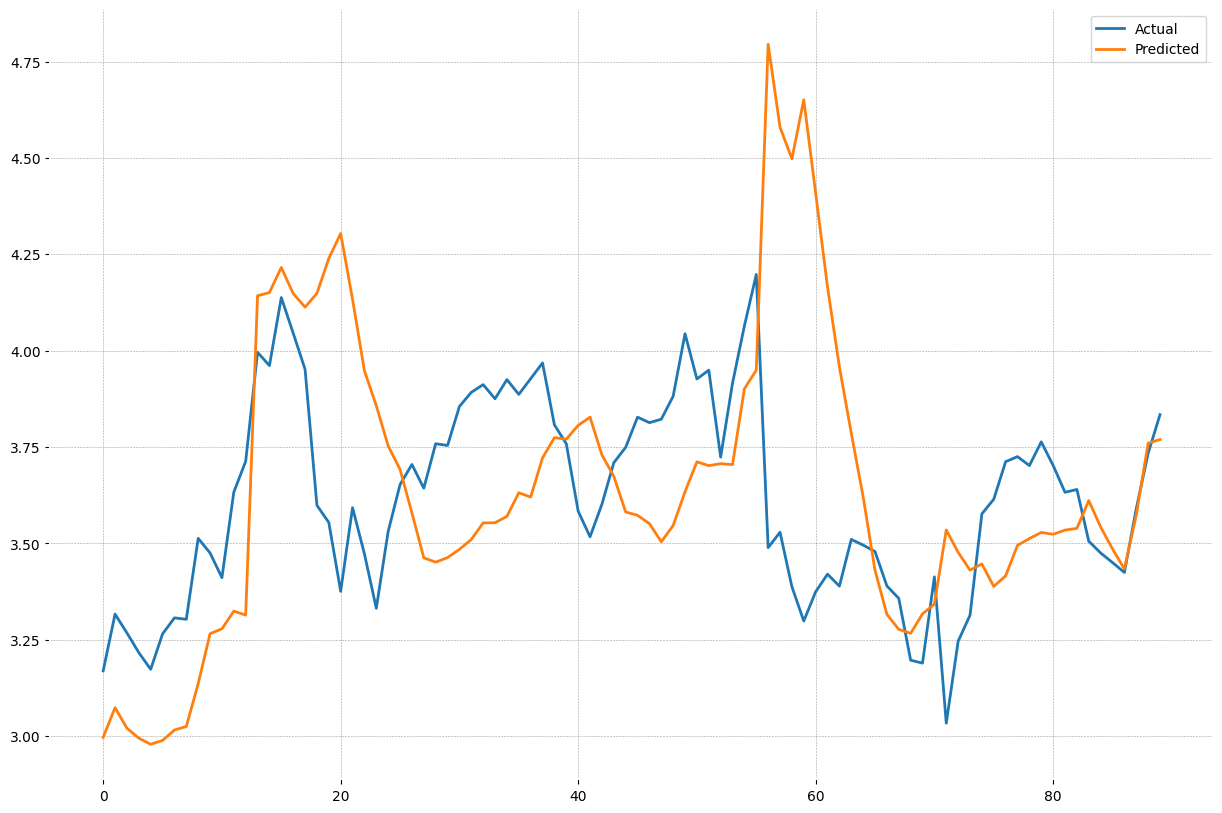

In [109]:
plt.figure(figsize=(15,10))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()